# Seattle Real Estate Evaluation - EDA - Simon Klemm

# 1

## Introduction

### Project Description

<p>&nbsp;</p>

**Goal/Purpose:** 


This project is about real estate data from King County, Washington, USA. The goal is to use EDA to work out insights and recommendations about the real estate market in King County and to give three recommendations for a potential buyer.

<p>&nbsp;</p>

**Stakeholder**

William and Angelo Rodriguez, Buyers - a young professional couple who are moving to Seattle and are looking for not just one new home, but two. They want and central city house and a fixer-upper on the countryside. William and Angelo are both working well-earning jobs and are in the process of adopting a beautiful baby girl. For their city house they would like at least two bedrooms, good condition, right in the city center. And for those long weekends, a quaint fixer-upper with beautiful views in the luscious green fields and forests of King County.

<p>&nbsp;</p>


**Questions to be Answered:**

- What zipcodes are best for William and Angel to consider for buying?
- Can the data give us insights around urbanity?
- What is the best time of the year to buy a country house in King County?

<p>&nbsp;</p>

**Assumptions/Methodology/Scope:** 

- The denser the population the more urban the area and vice-versa.
- There is an ideal time to buy a house on the countryside.
- The denser the population, the more expensive the market gets.

<p>&nbsp;</p>

### Data Description

**Content:** 

This dataset is a data base file with data about the King County real estate market. We are also using population density data from the US Census.

---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [2]:
# Import pandas and sqlalchemy engine
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

# Import dotenv
import os
from dotenv import load_dotenv

import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [3]:
# load dotenv variables
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

# create engine
db = create_engine(DB_STRING)

# load data with sql query into DataFrame
query_str = "SELECT * FROM eda.king_county_house_details d LEFT JOIN eda.king_county_house_sales s on s.house_id = d.id;" # mind the semicolon!!
df = pd.read_sql(query_str, db)
df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,1,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520
1,2,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192
2,3,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400
3,4,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875
4,5,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510


We imported the data from our database via sqlalchemy and with the sql query we came up with all together in the lesson. We agreed that we would left join the sales data to the house details data.

### Basic Data Exploration

In [4]:
# # Show rows and columns count
print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

# Rows count: 21597
# Columns count: 22

Rows count: 21597
Columns count: 22


In [5]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,1,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520
1,2,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192
2,3,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400
3,4,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875
4,5,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510


In [6]:
df.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
21592,21593,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,263000018
21593,21594,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,6600060120
21594,21595,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,1523300141
21595,21596,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,291310100
21596,21597,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,...,2008,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014-10-15,325000.0,1523300157


In [7]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id'],
      dtype='object')

The dataset includes around 21k rows and 22 columns. The column names are formatted in a python friendly way (underscores and lower case).

### Density Data

In [8]:
# read data about population density
pop = pd.read_csv('data/King_county_popluation_by_zip.csv')
pop = pop[['Zip','density', 'City','lat','long']]
pop

,Zip,density,City,lat,long
0,98164,15384.6,Seattle,47.6060,-122.3320
1,98165,15384.6,Seattle,47.7161,-122.3004
2,98121,10981.3,Seattle,47.6151,-122.3447
3,98101,7613.3,Seattle,47.6114,-122.3305
4,98104,6533.8,Seattle,47.6036,-122.3256
...,...,...,...,...,...
115,98160,0.0,Seattle,47.6062,-122.3321
116,98161,0.0,Seattle,47.6062,-122.3321
117,98174,0.0,Seattle,47.6062,-122.3321
118,98175,0.0,Seattle,47.7161,-122.3004


Let's look at the density table and see how we can define thresholds for urban and rural areas

In [9]:
pop['density'].describe(
    percentiles=[x / 10 for x in range(0,11)]
    )

count      120.000000
mean      1839.957500
std       2431.549185
min          0.000000
0%           0.000000
10%         24.230000
20%        170.440000
30%        666.100000
40%       1093.180000
50%       1374.100000
60%       1702.000000
70%       1919.500000
80%       2582.000000
90%       3371.070000
100%     15384.600000
max      15384.600000
Name: density, dtype: float64

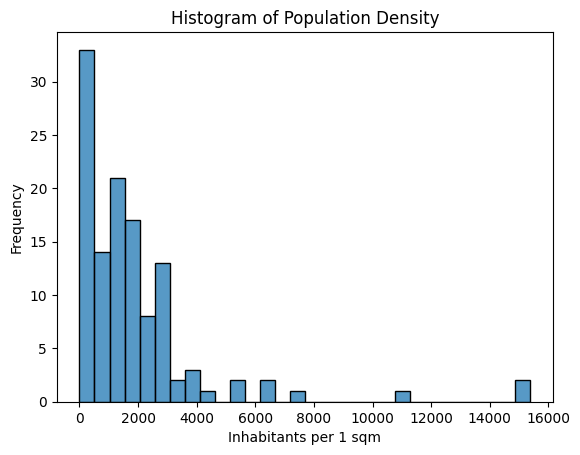

In [10]:
sns.histplot(data = pop,
             x='density',
             bins=30)
plt.title('Histogram of Population Density')
plt.xlabel('Inhabitants per 1 sqm')
plt.ylabel('Frequency')
plt.show()

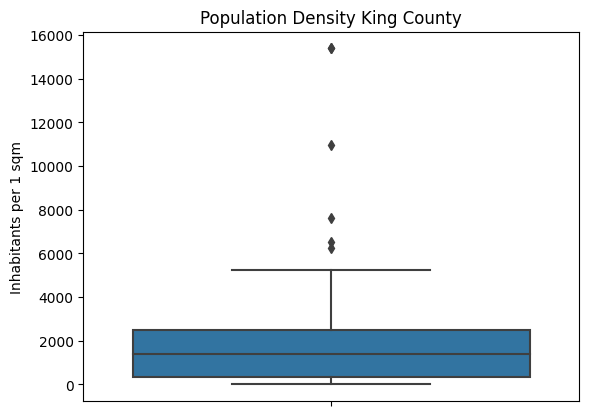

In [11]:
density_box = sns.boxplot(data=pop,
            y='density',
            )
plt.title('Population Density King County')
plt.ylabel('Inhabitants per 1 sqm')
plt.show()

Looking at the distribution and densities, we will categorize any density below the 25th percentile as rural and above 75th percentile as urban. The IQR would be suburbia.

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long_x,sqft_living15,sqft_lot15,date,price,house_id,density,City,lat_y,long_y
14119,14120,3.0,1.75,2060.0,3300.0,2.0,0.0,0.0,4,9,...,-122.320,1830.0,3712.0,2015-03-20,810000.0,1962200145,6228.4,Seattle,47.6302,-122.321
1704,1705,4.0,3.00,3130.0,2646.0,2.5,0.0,0.0,5,9,...,-122.316,2920.0,4500.0,2015-04-22,1270000.0,1336300445,6228.4,Seattle,47.6302,-122.321
3745,3746,3.0,3.25,1490.0,902.0,3.0,0.0,0.0,3,8,...,-122.324,1550.0,1092.0,2014-12-03,500000.0,3383900057,6228.4,Seattle,47.6302,-122.321
21055,21056,3.0,2.50,1990.0,1891.0,3.0,0.0,0.0,3,9,...,-122.324,1990.0,3600.0,2015-02-20,1080000.0,2163900081,6228.4,Seattle,47.6302,-122.321
17580,17581,3.0,1.75,2340.0,5500.0,2.0,0.0,2.0,3,9,...,-122.319,2830.0,5500.0,2015-03-31,982218.0,3720800115,6228.4,Seattle,47.6302,-122.321


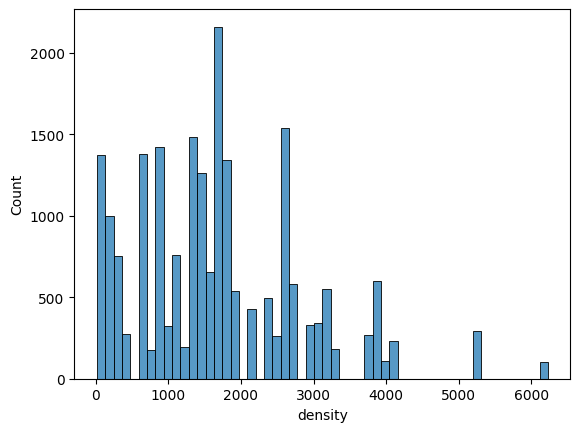

In [12]:
# merge density data with housing data
df_2 = df.merge(pop, how='left', left_on='zipcode', right_on='Zip').drop(['Zip'], axis=1)
sns.histplot(df_2,
             x='density')
df_2.sort_values(['density'], ascending=False).head()

In [13]:
# merge density data with housing data
df = df.merge(pop, how='left', left_on='zipcode', right_on='Zip').drop(['Zip'], axis=1)
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long_x,sqft_living15,sqft_lot15,date,price,house_id,density,City,lat_y,long_y
0,1,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1919.5,Seattle,47.4924,-122.2359
1,2,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2653.4,Seattle,47.7170,-122.3015
2,3,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,1399.0,Kenmore,47.7542,-122.2475
3,4,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,2480.6,Seattle,47.5398,-122.3878
4,5,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,931.8,Sammamish,47.6254,-122.0462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,-122.346,1530.0,1509.0,2014-05-21,360000.0,263000018,3815.7,Seattle,47.6733,-122.3426
21593,21594,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,-122.362,1830.0,7200.0,2015-02-23,400000.0,6600060120,2148.4,Seattle,47.4995,-122.3603
21594,21595,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,-122.299,1020.0,2007.0,2014-06-23,402101.0,1523300141,3053.9,Seattle,47.5846,-122.3005
21595,21596,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,-122.069,1410.0,1287.0,2015-01-16,400000.0,291310100,180.8,Issaquah,47.4974,-122.0107


#### Check Data Types

In [14]:
# # Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat_x          21597 non-null  float64
 16  long_x         21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

- Most columns are either **floats** or **ints**.
- `date` is a **string**. `date` should be a **datetime** type instead.

#### Check Missing Data

In [15]:
# import missingno
import missingno as msno
import matplotlib.pyplot as plt

In [16]:
# check for missing values in columns
df.isna().sum().sort_values()

id                  0
house_id            0
price               0
date                0
sqft_lot15          0
sqft_living15       0
long_x              0
lat_x               0
zipcode             0
sqft_above          0
yr_built            0
condition           0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
grade               0
view               63
lat_y             198
density           198
City              198
long_y            198
sqft_basement     452
waterfront       2391
yr_renovated     3848
dtype: int64

<Axes: >

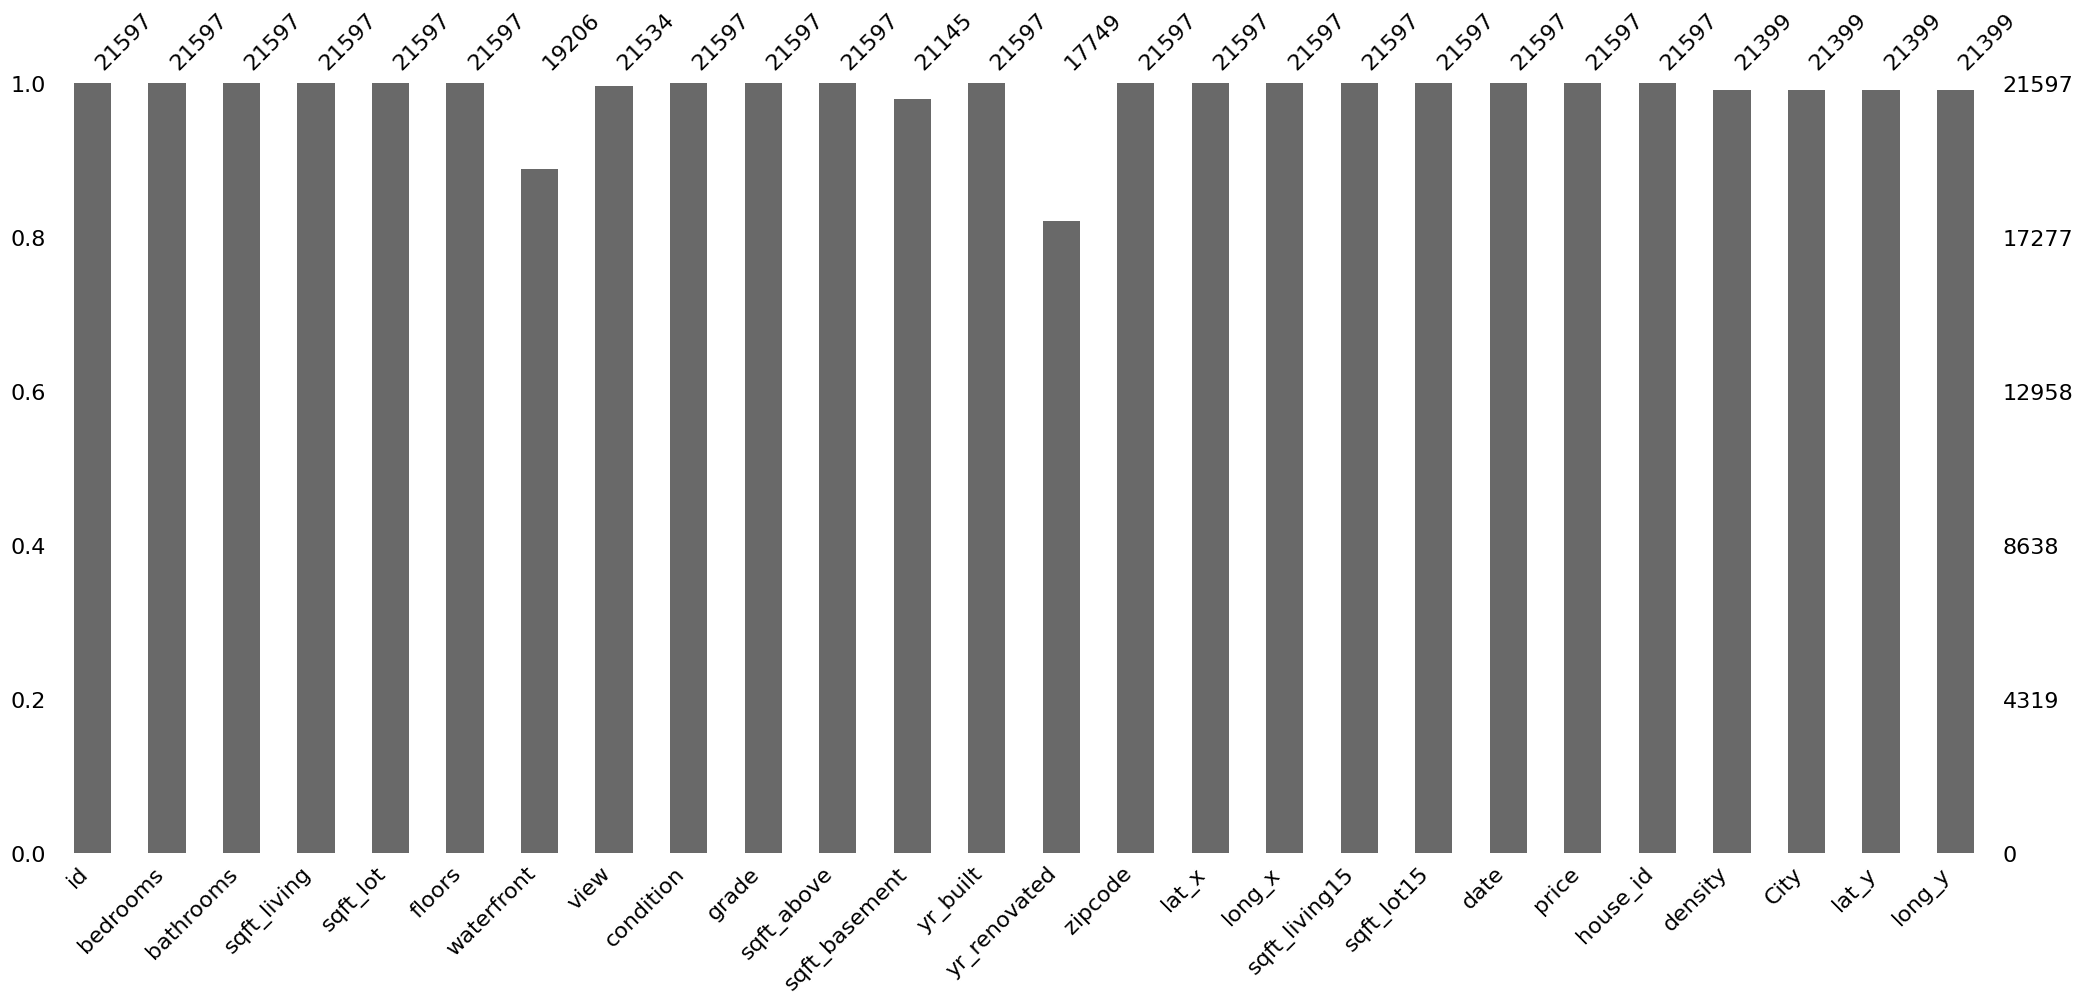

In [17]:
# plotting percentage of missing values per column
msno.bar(df)

<Axes: >

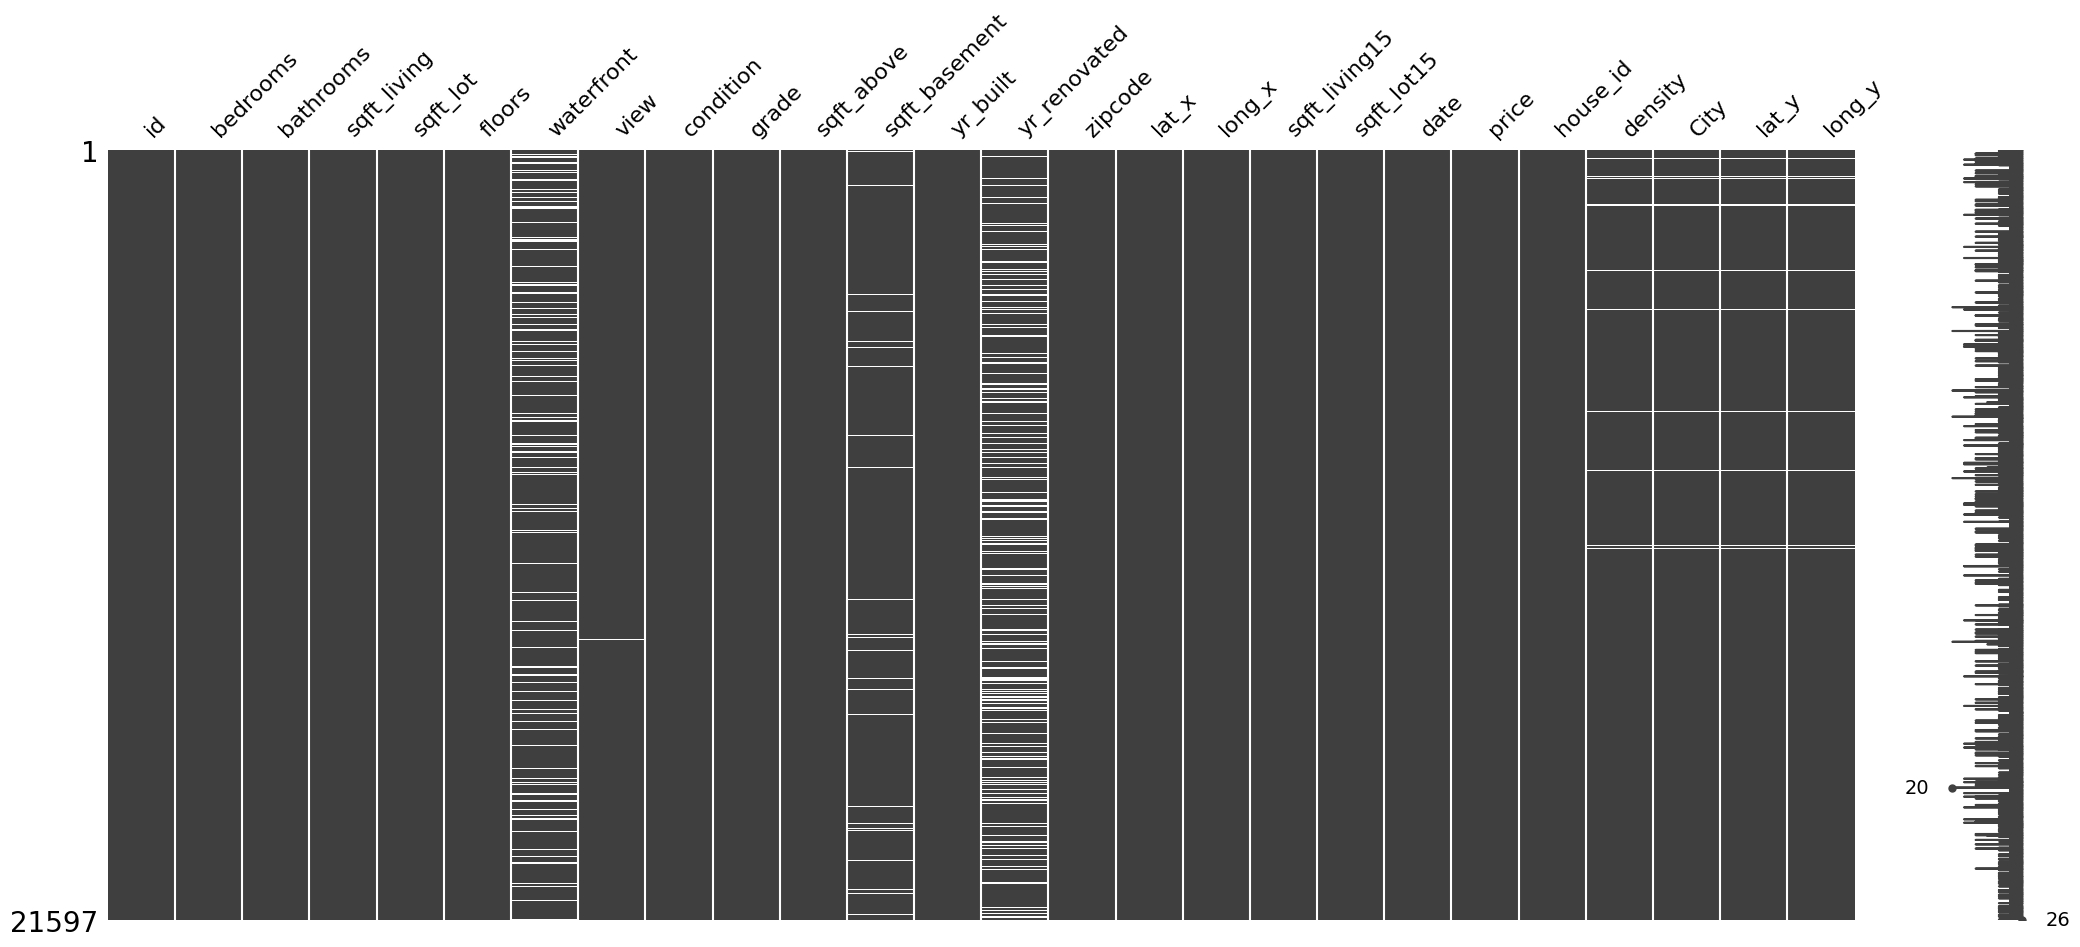

In [18]:
# check the missingno matrix for locations of missing data
msno.matrix(df)

The following columns are missing values:<br>
view               63<br>
sqft_basement     452<br>
waterfront       2391<br>
yr_renovated     3848<br>
After looking at the locations, there do not seem to be any patterns for the missing data at first glance.

#### Check for Duplicate Rows

In [19]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

There are no duplicate rows.

#### Check Unnecessary Columns

We only need qualitative information (`view, condition, grade, ...`) to calculate our score and the index columns like `zipcode`.

For our purposes we don't need all the columns. We can drop `['sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'waterfront']`

#### Check Uniqueness of Data

In [20]:
# # Print the percentage similarity of values (the lower %, the better)
num_unique = df.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----')
print(100/num_unique)

---- Percentage Similarity of Values (%) -----
waterfront       50.000000
view             20.000000
condition        20.000000
floors           16.666667
grade             9.090909
bedrooms          8.333333
City              4.166667
bathrooms         3.448276
long_y            1.470588
density           1.449275
lat_y             1.449275
zipcode           1.428571
yr_renovated      1.428571
yr_built          0.862069
sqft_basement     0.330033
date              0.268817
long_x            0.132979
sqft_living15     0.128700
sqft_above        0.106157
sqft_living       0.096712
price             0.027609
lat_x             0.019869
sqft_lot15        0.011518
sqft_lot          0.010229
house_id          0.004669
id                0.004630
dtype: float64


There are a number of categorical variables where values are quite similar (e.g. waterfront only `true` or `false`). Those can remain similar. The continous variables like sqft are dissimilar enough.

#### Check Data Range

In [21]:
# # Print summary statistics
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21597.0,NaN,NaN,NaN,10799.0,6234.661218,1.0,5400.0,10799.0,16198.0,21597.0
bedrooms,21597.0,NaN,NaN,NaN,3.3732,0.926299,1.0,3.0,3.0,4.0,33.0
bathrooms,21597.0,NaN,NaN,NaN,2.115826,0.768984,0.5,1.75,2.25,2.5,8.0
sqft_living,21597.0,NaN,NaN,NaN,2080.32185,918.106125,370.0,1430.0,1910.0,2550.0,13540.0
sqft_lot,21597.0,NaN,NaN,NaN,15099.40876,41412.636876,520.0,5040.0,7618.0,10685.0,1651359.0
floors,21597.0,NaN,NaN,NaN,1.494096,0.539683,1.0,1.0,1.5,2.0,3.5
waterfront,19206.0,NaN,NaN,NaN,0.007602,0.086858,0.0,0.0,0.0,0.0,1.0
view,21534.0,NaN,NaN,NaN,0.233863,0.765686,0.0,0.0,0.0,0.0,4.0
condition,21597.0,NaN,NaN,NaN,3.409825,0.650546,1.0,3.0,3.0,4.0,5.0
grade,21597.0,NaN,NaN,NaN,7.657915,1.1732,3.0,7.0,7.0,8.0,13.0


**Range and type of variables**

|  | min | max | type | range |
|---|---|---|---|---|
| bedrooms | 1 | 33 | categorical | 32 |
| bathrooms | 0.5 | 8 | categorical | 7.5 |
| floors | 1 | 3.5 | categorical | 2.5 |
| waterfront | 0 | 1 | categorical | 1 |
| view | 0 | 4 | categorical | 4 |
| condition | 1 | 5 | categorical | 4 |
| grade | 3 | 13 | categorical | 10 |
| yr_built | 1900 | 2015 | categorical | 115 |
| yr_renovated | 0 | 20150 | categorical | 20150 |
| zipcode | 98001 | 98199 | categorical | 198 |
| sqft_above | 370 | 9410 | numerical | 9040 |
| sqft_basement | 0 | 4820 | numerical | 4820 |
| sqft_living | 370 | 13540 | numerical | 13170 |
| sqft_lot | 520 | 1651359 | numerical | 1650839 |
| price | 78000 | 7700000 | numerical | 7622000 |
| lat | 47.1559 | 47.7776 | numerical | 0.6217 |
| long | -122.519 | -121.315 | numerical | 1.204 |
| sqft_living15 | 399 | 6210 | numerical | 5811 |
| sqft_lot15 | 651 | 871200 | numerical | 870549 |

We can see that the `yr_renovated` table has non-sensical values, i.e. skewed by one decimal to the left.

---

### Areas to Fix
**Data Types**
- [x] Change `date` column from string to panda datetime format.

**Missing Data**
- [x] `yr_renovated` has some NaNs but also some 0s. Create new feature to indicate if renovated or not.

**Duplicate Rows**
- [x] No duplicate rows.

**Uniqueness of Data**
- [x] No need to intervene

**Data Range**
- [x] The `yr_renovated` column is skewed by one decimal. Divide all values by 10.

The population dataset looks good. -> Investigate if needed.

---

# 3

## Data Preprocessing

### Drop Redundant Columns

In [22]:
# define redundant columns
columns_to_drop = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'waterfront']

# drop columns and save changes immediately
df.drop(columns=columns_to_drop, inplace=True)
df

,id,bedrooms,bathrooms,floors,view,condition,grade,yr_renovated,zipcode,lat_x,long_x,date,price,house_id,density,City,lat_y,long_y
0,1,3.0,1.00,1.0,0.0,3,7,0.0,98178,47.5112,-122.257,2014-10-13,221900.0,7129300520,1919.5,Seattle,47.4924,-122.2359
1,2,3.0,2.25,2.0,0.0,3,7,19910.0,98125,47.7210,-122.319,2014-12-09,538000.0,6414100192,2653.4,Seattle,47.7170,-122.3015
2,3,2.0,1.00,1.0,0.0,3,6,NaN,98028,47.7379,-122.233,2015-02-25,180000.0,5631500400,1399.0,Kenmore,47.7542,-122.2475
3,4,4.0,3.00,1.0,0.0,5,7,0.0,98136,47.5208,-122.393,2014-12-09,604000.0,2487200875,2480.6,Seattle,47.5398,-122.3878
4,5,3.0,2.00,1.0,0.0,3,8,0.0,98074,47.6168,-122.045,2015-02-18,510000.0,1954400510,931.8,Sammamish,47.6254,-122.0462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,3.0,2.50,3.0,0.0,3,8,0.0,98103,47.6993,-122.346,2014-05-21,360000.0,263000018,3815.7,Seattle,47.6733,-122.3426
21593,21594,4.0,2.50,2.0,0.0,3,8,0.0,98146,47.5107,-122.362,2015-02-23,400000.0,6600060120,2148.4,Seattle,47.4995,-122.3603
21594,21595,2.0,0.75,2.0,0.0,3,7,0.0,98144,47.5944,-122.299,2014-06-23,402101.0,1523300141,3053.9,Seattle,47.5846,-122.3005
21595,21596,3.0,2.50,2.0,0.0,3,8,0.0,98027,47.5345,-122.069,2015-01-16,400000.0,291310100,180.8,Issaquah,47.4974,-122.0107


### Changing Data Types

The only change we want to do is change the date string to datetime type. The only other time we want to change a type is for the merges above and below.

In [23]:
# # Convert date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: date
Non-Null Count  Dtype         
--------------  -----         
21597 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 168.9 KB


### Handling Missing Values

The `yr_renovated` table is missing a couple of values, but we can't just make all 0s to NaN or vice-versa. We will create a separate feature to indicate renovation.

### Handling Unreasonable Data

The `yr_renovated` column is skewed by one decimal, so we divide all values by 10.

In [24]:
# Divide all values in yr_renovated column by 10
df['yr_renovated'] = df['yr_renovated'] / 10

### Feature Engineering / Transformation

The idea is to give each house a client score. One score for country and one score for city properties. We can then surface the avg. score per zipcode for example and give the client a recommendation on where his wishes are likely going to be met.

Our client: William and Angelo Rodriguez, Buyers - a young professional couple who are looking for not just one new home, but two. They want and central city house and a fixer-upper on the countryside. William and Angelo are both working high-earning jobs and are in the process of adopting a beautiful baby girl. For their city house they would like at least two bedrooms, good condition, right in the city center. And for those long weekends, a quaint fixer-upper with beautiful views in the lucious green fields and forests of King County.


The scores will be calculated as follows:
|           | country | city   |
|-----------|---------|--------|
| view      | >=3     | >=1    |
| bathrooms | >=1     | >=1    |
| condition | -       | >=3    |
| bedrooms  | 2-3     | 2-3    |
| grade     | >=7     | >=7    |
| renovated | true    | - |

1. We will create one column for urbanity type, i.e. `rural`, `city`, `suburb` based on the population density.

In [25]:
# define limits for urbanity
perc_rural = df['density'].quantile(q=.25)
perc_city = df['density'].quantile(q=.85)

df['urbanity'] = np.where(df['density'] <= perc_rural, 'rural',
                          np.where(df['density'] < perc_city, 'suburb', 'city'))


2. We will create a column that determines if the property was renovated. For columns that have NaN we do not include those in the renovated set, because we have no information.

In [26]:
# Create column to indicate if property was renovated. For NaN we assume that not renovated.
df['renovated'] = df['yr_renovated'] == 0

3. This is where the score calculation is happening.

The scores will be calculated as follows:
|           | country | city   |
|-----------|---------|--------|
| view      | >=3     | >=1    |
| bathrooms | >=1     | >=1    |
| condition | -       | >=3    |
| bedrooms  | 2-3     | 2-3    |
| grade     | >=7     | >=7    |
| renovated | true    | - |

In [27]:
# Create score column with default 0
df['client_score'] = 0

# translate above table into two sets of conditions
country_conditions = [
    (df['view'] >= 1),
    (df['bathrooms'] >= 1),
    ((df['bedrooms'] >= 2)),
    (df['grade'] >= 6),
    (~df['renovated']) # ~ delivers negation of a series of booleans
 ]
city_conditions = [
    (df['view'] >= 1),
    (df['bathrooms'] >= 1),
    ((df['bedrooms'] >= 2)),
    (df['grade'] >= 6),
    (df['condition'] >= 3)
]

# loop through conditions to add up score
# for every condition, locate all rows that match condition and update the column 'client_score' + 1
for condition in country_conditions: 
    df.loc[(df['urbanity'] == 'rural') & condition, 'client_score'] += 1
for condition in city_conditions:
    df.loc[(df['urbanity'] == 'city') & condition, 'client_score'] += 1

---

# 4

## Data Analysis

Now we can start to visualize our datasets.

Order:
1. Import necessary packages
2. Read in shapefile for King County (see source in References at bottom)
3. 

In [28]:
# import some more packages
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import geopandas as gpd
import plotly.express as px


In [29]:
#read shapefile from https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::zipcodes-for-king-county-and-surrounding-area-zipcode-area/explore

wa = gpd.read_file('map_data/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp')

# this generates a GeoFrame object based on the shapefile

Now we have the map file by zip code of King County. Lets take a look at some sales data connected to ZIP codes.

In [30]:
# group df by zipcode to be able to map to wa
grouped_df = df.groupby('zipcode')

# create the pivot table with needed formulas/columns
sales_df = grouped_df.agg({
    'id': 'count',
    'price': 'sum',
    'client_score': 'mean'
}).reset_index()

# rename new columns
sales_df.columns = sales_df.columns.str.replace('id','num_sales')
sales_df.columns = sales_df.columns.str.replace('price','total_rev')

# get average revenue per zipcode
sales_df['avg_rev'] = sales_df['total_rev'] / sales_df['num_sales']

# change zipcode column from int to string as preperation for merge with wa
sales_df = sales_df.astype({'zipcode':'str'})
sales_df

,zipcode,num_sales,total_rev,client_score,avg_rev
0,98001,361,101511348.0,3.227147,2.811949e+05
1,98002,199,46622523.0,0.000000,2.342840e+05
2,98003,280,82351158.0,0.000000,2.941113e+05
3,98004,317,430018105.0,0.000000,1.356524e+06
4,98005,168,136128669.0,0.000000,8.102897e+05
...,...,...,...,...,...
65,98177,255,172486945.0,0.000000,6.764194e+05
66,98178,262,81380542.0,0.000000,3.106128e+05
67,98188,136,39314655.0,0.000000,2.890783e+05
68,98198,280,84811087.0,0.000000,3.028967e+05


Now we can merge wa with our new sales data table.

In [31]:
#Copy our GeoFrame
wa_sales = wa.copy()

# Merge the sales data on zipcode column and drop column on the right
# left join to keep all Geo data and just enrich the GeoData with our sales data
wa_sales = wa_sales.merge(sales_df, how='left', left_on='ZIPCODE', right_on='zipcode').drop('zipcode', axis=1)
wa_sales

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAM,PREFERRED_,Shape_Leng,Shape_Area,geometry,num_sales,total_rev,client_score,avg_rev
0,1,98001,98001,033,Standard,King County,AUBURN,147643.355749,5.253133e+08,"POLYGON ((-122.29032 47.35495, -122.28851 47.3...",361.0,101511348.0,3.227147,2.811949e+05
1,2,98002,98002,033,Standard,King County,AUBURN,104440.087200,2.053028e+08,"POLYGON ((-122.22820 47.35395, -122.22546 47.3...",199.0,46622523.0,0.000000,2.342840e+05
2,3,98003,98003,033,Standard,King County,FEDERAL WAY,123733.570612,3.169426e+08,"POLYGON ((-122.30392 47.35794, -122.30393 47.3...",280.0,82351158.0,0.000000,2.941113e+05
3,4,98004,98004,033,Standard,King County,BELLEVUE,99325.951735,2.507454e+08,"POLYGON ((-122.21189 47.64635, -122.21189 47.6...",317.0,430018105.0,0.000000,1.356524e+06
4,5,98005,98005,033,Standard,King County,BELLEVUE,116554.738076,2.114337e+08,"MULTIPOLYGON (((-122.15354 47.66056, -122.1534...",168.0,136128669.0,0.000000,8.102897e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,205,98940,98940,037,PO Box,Kittitas County,RONALD,465055.065539,5.451150e+09,"POLYGON ((-121.11377 47.59713, -121.11374 47.5...",NaN,NaN,NaN,NaN
205,206,98941,98941,037,PO Box,Kittitas County,ROSLYN,128017.069816,3.570243e+08,"POLYGON ((-121.00593 47.23316, -120.96324 47.2...",NaN,NaN,NaN,NaN
206,207,98943,98943,037,PO Box,Kittitas County,SOUTH CLE ELUM,14265.719152,1.006428e+07,"POLYGON ((-120.94261 47.18516, -120.94232 47.1...",NaN,NaN,NaN,NaN
207,208,98946,98946,037,Standard,Kittitas County,THORP,148179.572807,8.366639e+08,"POLYGON ((-120.81410 47.04108, -120.81469 47.1...",NaN,NaN,NaN,NaN


For our density charts, we also need population data. Luckily, we already loaded the dataframe earlier!

In [32]:
#preparing pop and using copy
pop_str = pop.copy()

# like above, convert zipcode column to string in order to merge on zipcode
pop_str['Zip'] = pop_str['Zip'].astype('str')

# adding density and city data to the wa, droping one zipcode column, left join same reason as above
wa_sales_dens = wa_sales.merge(pop_str, how='left', left_on='ZIPCODE', right_on='Zip').drop('Zip', axis=1)
wa_sales_dens.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAM,PREFERRED_,Shape_Leng,Shape_Area,geometry,num_sales,total_rev,client_score,avg_rev,density,City,lat,long
0,1,98001,98001,033,Standard,King County,AUBURN,147643.355749,5.253133e+08,"POLYGON ((-122.29032 47.35495, -122.28851 47.3...",361.0,101511348.0,3.227147,2.811949e+05,662.3,Auburn,47.3099,-122.2653
1,2,98002,98002,033,Standard,King County,AUBURN,104440.087200,2.053028e+08,"POLYGON ((-122.22820 47.35395, -122.22546 47.3...",199.0,46622523.0,0.000000,2.342840e+05,1699.0,Auburn,47.3050,-122.2067
2,3,98003,98003,033,Standard,King County,FEDERAL WAY,123733.570612,3.169426e+08,"POLYGON ((-122.30392 47.35794, -122.30393 47.3...",280.0,82351158.0,0.000000,2.941113e+05,1465.7,Federal Way,47.3203,-122.3117
3,4,98004,98004,033,Standard,King County,BELLEVUE,99325.951735,2.507454e+08,"POLYGON ((-122.21189 47.64635, -122.21189 47.6...",317.0,430018105.0,0.000000,1.356524e+06,1532.4,Bellevue,47.6155,-122.2072
4,5,98005,98005,033,Standard,King County,BELLEVUE,116554.738076,2.114337e+08,"MULTIPOLYGON (((-122.15354 47.66056, -122.1534...",168.0,136128669.0,0.000000,8.102897e+05,910.2,Bellevue,47.6150,-122.1663


To help orientation on the map we took the 5 top cities of King County and their long and lat values to plot on our maps.

In [33]:
# Create a dict of city locations
city_data = {'City': ['Seattle', 'Bellevue', 'Kent', 'Renton', 'Federal Way'],
             'Latitude': [47.6062, 47.6104, 47.3809, 47.4799, 47.3135],
             'Longitude': [-122.3321, -122.2007, -122.2348, -122.2034, -122.3393]}

# Create a GeoFrame with constructor using the lat and long values of previous dict.
city_df = gpd.GeoDataFrame(city_data, geometry=gpd.points_from_xy(city_data['Longitude'], city_data['Latitude']))

### Plotting the Maps

Now it's time to plot the maps.

First, we want to see the average revenue by zip with the average client scores.

<Axes: >

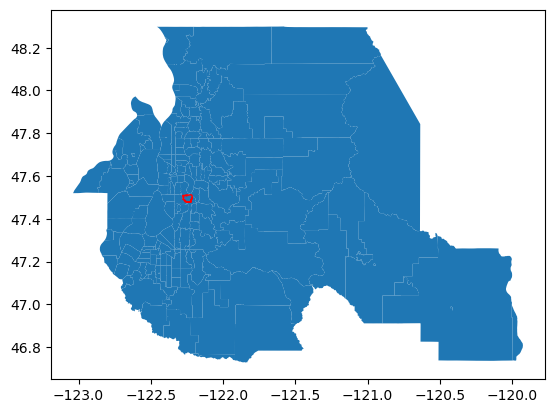

In [54]:
ax2 = wa_sales.plot()
#ax2.set_aspect(1)
wa_sales[wa_sales['ZIP']==98178].plot(ax=ax2, edgecolor='red', linewidth=1)

In [50]:
wa_sales[wa_sales['ZIP']==98178]

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAM,PREFERRED_,Shape_Leng,Shape_Area,geometry,num_sales,total_rev,client_score,avg_rev
96,97,98178,98178,033,Standard,King County,SEATTLE,69927.941707,1.522099e+08,"POLYGON ((-122.22167 47.51296, -122.21764 47.5...",262.0,81380542.0,0.0,310612.755725


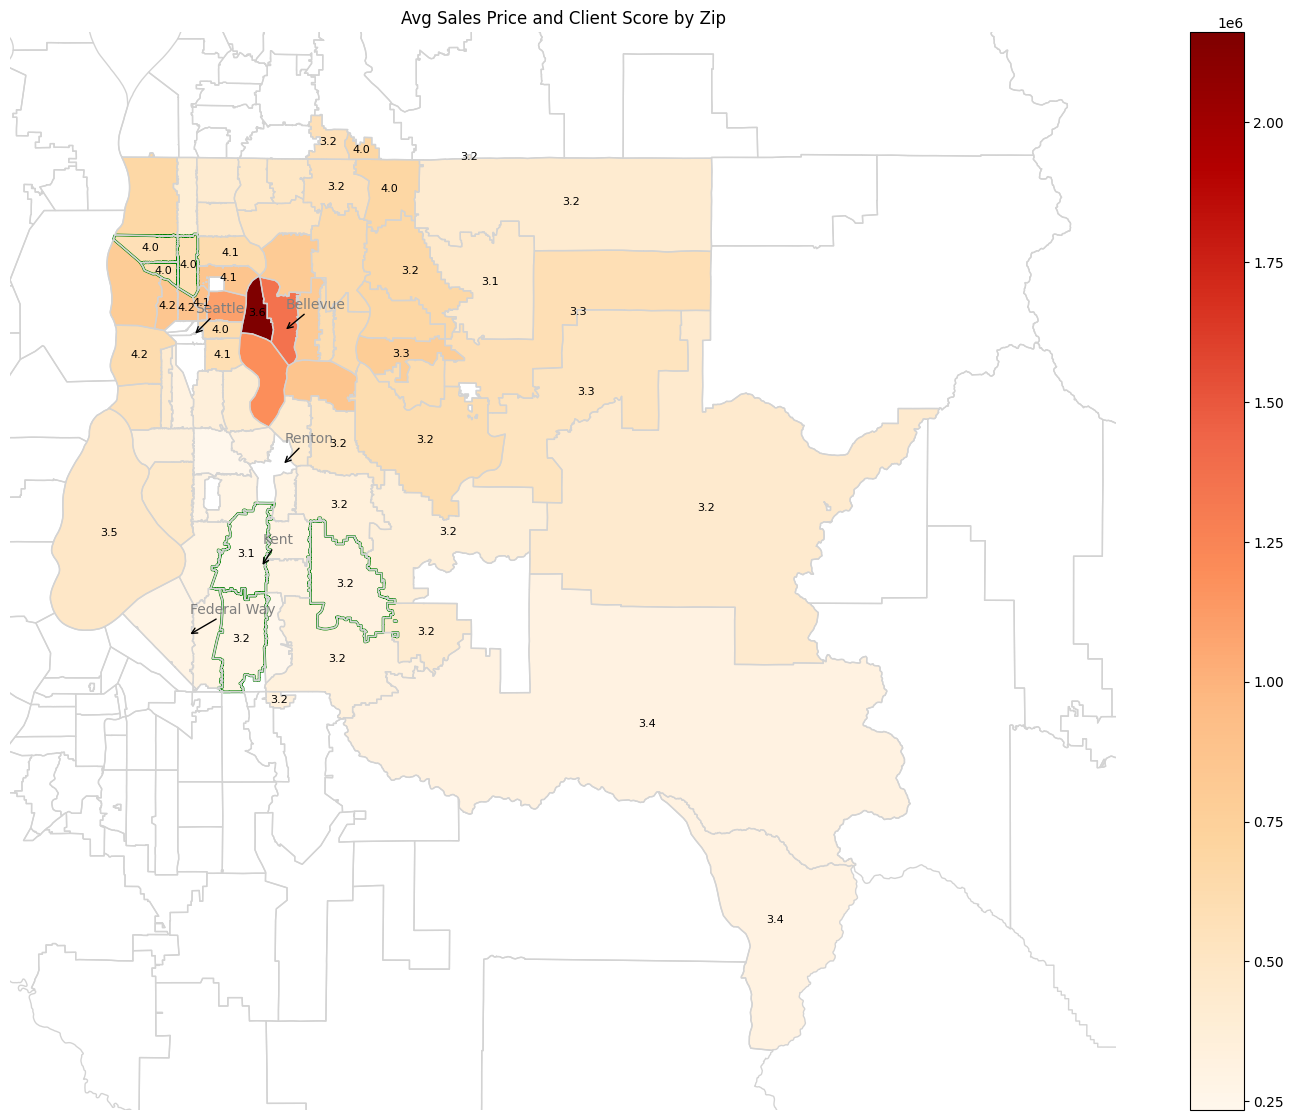

In [62]:
# plot for presentation

# create plot objects with dimensions
fig, ax = plt.subplots(figsize=(19,14))

# Set specific coordinates for zooming
x_min, x_max = -122.6, -121
y_min, y_max = 46.85, 47.9

# Set limits for x and y axes
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Plot zipcode boundaries
wa_sales.boundary.plot(ax=ax, color='lightgray', linewidth=1.0)

# plot heatmap for avg revenue by zipcode with color scheme 0rRd
map = wa_sales.plot(column='avg_rev', ax=ax, cmap='OrRd', legend=True)

# Plot city names
for city, x, y in zip(city_df['City'], city_df.geometry.x, city_df.geometry.y):
    ax.annotate(city, (x, y), textcoords="offset points", xytext=(0,15), ha='left', fontsize=10, color='gray',
                arrowprops=dict(arrowstyle="->", color='black', shrinkA=0, shrinkB=0))
    
# plot for average client scores
for polygon, avg_score in zip(wa_sales_dens.geometry, wa_sales_dens['client_score']): # combine coordinates with client score averages
    x, y = polygon.centroid.x, polygon.centroid.y # get center of each polygon
    if not np.isnan(avg_score) and avg_score > 0: # plot each score if not nan or 0
        ax.text(x, y, f'{avg_score:.1f}', fontsize=8, ha='center', va='center', color='black') # one decimal plotting with properties

wa_sales[wa_sales['ZIP'].isin([98032, 98001, 98042])].plot(ax=map, edgecolor='green', linewidth=2, facecolor='none')
wa_sales[wa_sales['ZIP'].isin([98117, 98107, 98103])].plot(ax=map, edgecolor='green', linewidth=2, facecolor='none')


# Add title and turn off axis
plt.title('Avg Sales Price and Client Score by Zip')
plt.axis('off')

# Show the plot
plt.show()

Now we want to overlay population density and client score. We create a heatmap for the density and plot the average scores on top.

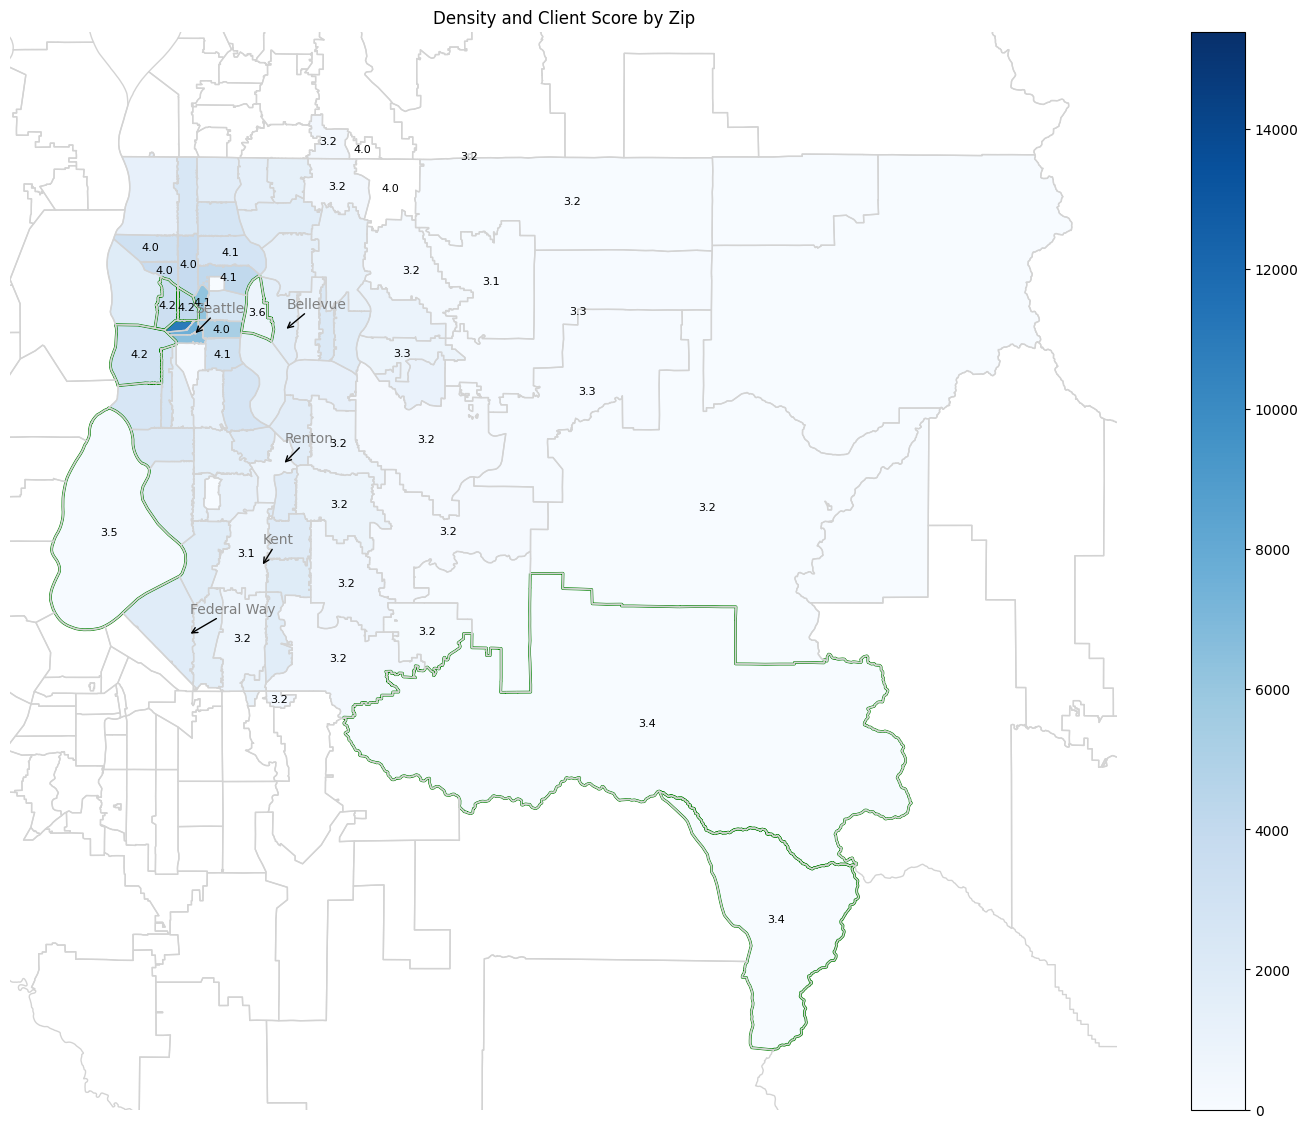

In [63]:
# plot for presentation
# mostly identical comments as above
fig, ax = plt.subplots(figsize=(19,14))

# Set specific coordinates for zooming
x_min, x_max = -122.6, -121
y_min, y_max = 46.85, 47.9

# Set limits for x and y axes
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

wa_sales_dens.boundary.plot(ax=ax, color='lightgray', linewidth=1.0)  # Plot state boundaries
map2 = wa_sales_dens.plot(column='density', ax=ax, cmap='Blues', legend=True)

# Plot city names
for city, x, y in zip(city_df['City'], city_df.geometry.x, city_df.geometry.y):
    ax.annotate(city, (x, y), textcoords="offset points", xytext=(0,15), ha='left', fontsize=10, color='gray',
                arrowprops=dict(arrowstyle="->", color='black', shrinkA=0, shrinkB=0))
    
# Bubble plot for average client scores
for polygon, avg_score in zip(wa_sales_dens.geometry, wa_sales_dens['client_score']):
    x, y = polygon.centroid.x, polygon.centroid.y
    if not np.isnan(avg_score) and avg_score > 0:
        ax.text(x, y, f'{avg_score:.1f}', fontsize=8, ha='center', va='center', color='black')

wa_sales[wa_sales['ZIP'].isin([98039, 98070, 98022])].plot(ax=map2, edgecolor='green', linewidth=2, facecolor='none')
wa_sales[wa_sales['ZIP'].isin([98119, 98116, 98109])].plot(ax=map2, edgecolor='green', linewidth=2, facecolor='none')
# Add title and turn off axis
plt.title('Density and Client Score by Zip')
plt.axis('off')

# Show the plot
plt.show()

Now we can also try to zoom into the city center of Seattle.

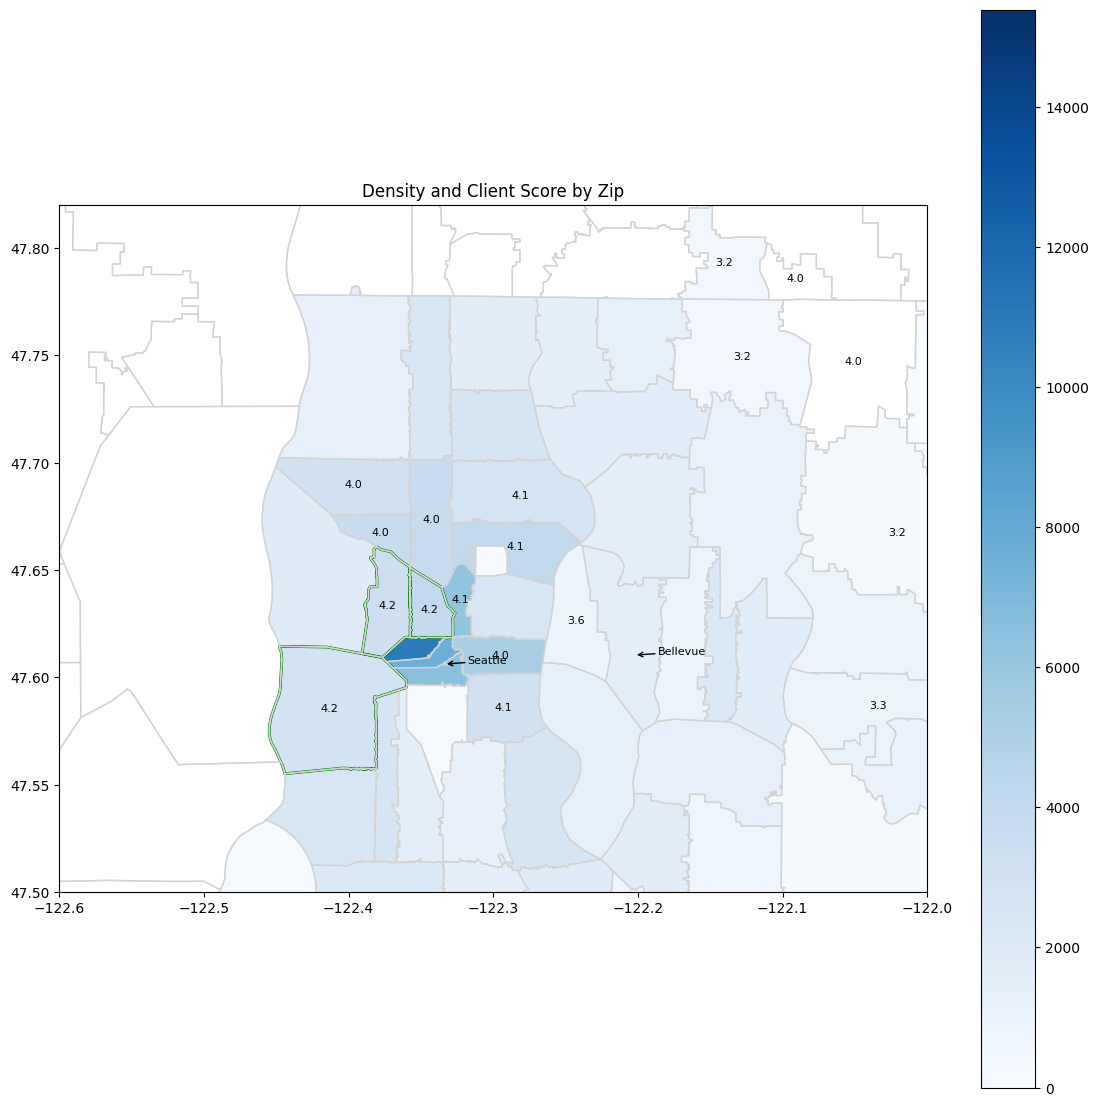

In [65]:
# similar to above
fig, ax = plt.subplots(figsize=(14,14))

# Set specific coordinates for zooming
x_min, x_max = -122.6, -122
y_min, y_max = 47.5, 47.82

# Set limits for x and y axes
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

wa_sales_dens.boundary.plot(ax=ax, color='lightgray', linewidth=1.0)
map3 = wa_sales_dens.plot(column='density', ax=ax, cmap='Blues', legend=True)

# Plot city names
for city, x, y in zip(city_df['City'], city_df.geometry.x, city_df.geometry.y):
    ax.annotate(city, (x, y), textcoords="offset points", xytext=(15,0), ha='left', fontsize=8, color='black',
                arrowprops=dict(arrowstyle="->", color='black', shrinkA=0, shrinkB=0))
    
# Bubble plot for average client scores
for polygon, avg_score in zip(wa_sales_dens.geometry, wa_sales_dens['client_score']):
    x, y = polygon.centroid.x, polygon.centroid.y
    if not np.isnan(avg_score) and avg_score > 0 and x_min <= x <= x_max and y_min <= y <= y_max: # avoid plotting outside of map
        ax.text(x, y, f'{avg_score:.1f}', fontsize=8, ha='center', va='center', color='black')

wa_sales[wa_sales['ZIP'].isin([98119, 98116, 98109])].plot(ax=map3, edgecolor='green', linewidth=2, facecolor='none')
# Add title and turn off axis
plt.title('Density and Client Score by Zip')
# plt.axis('off')

# Show the plot
plt.show()

***Comparison and Top Tables for Presentation*** <br>
These tables are for vizualization, we export the results and use a spreadsheet editor to make them look nice.

In [ ]:
top_city_scores = df.query('urbanity == "city"').groupby('zipcode')['client_score'].mean().sort_values(ascending=False).head(5).to_csv('results/top_city_scores.csv')
top_rural_scores = df.query('urbanity == "rural"').groupby('zipcode')['client_score'].mean().sort_values(ascending=False).head(5).to_csv('results/top_rural_scores.csv')

top_city_rev = df.query('urbanity == "city"').groupby(['zipcode'])[['price','client_score']].mean().sort_values(by='price', ascending=True).head(5).to_csv('results/top_city_rev.csv')
top_city_rev
top_city_rev = df.query('urbanity == "rural"').groupby(['zipcode'])[['price','client_score']].mean().sort_values(by='price', ascending=True).head(5).to_csv('results/top_rural_rev.csv')

---

# 5

## Conclusion

### Insights

- We can give William and Angel a good recommendation on where to look into houses for both the country and the city house.
- We also saw, that population density is an indicator of urbaness.
- The population density is also an important factor regarding house prices.

### Possible Next Steps
Areas to expand on:
- Regarding timing of purchase, we need to investigate further.

---

# 6

## Epilogue

### References

Shapefile for King County from https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::zipcodes-for-king-county-and-surrounding-area-zipcode-area/explore

### Versioning
Notebook and insights by Simon Klemm.
- Version: 1.0
- Date: 2023-09-22

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b689e16b-e36c-4f8c-b17a-b3e876352669' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>